In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import square
import numpy as np


In [11]:
if __name__ == "__main__":

    #1. Define the parameters for SpEC
  

    # for nice plots later keep the upper limit of E about 0.5 V more than E02 (note this will depend on the r value that you choose)
    E0_l=[0.8,1.1,1.4] # list of standard potentials
    r_l=[0.37,0.2,0.3] # list of itneraction enthalpies in eV
    WLs=np.arange(400,900,10) # Wavelengths
    mu_all=[[450,900,650],[450,550,650],[550,700,750]] # list of mu values for the gaussian peaks
    sigma_all=[[200,200,200],[200,200,200],[200,200,100]] # list of sigma values for the gaussian peaks
    alphas=[10,20,5]# these are the peak values of Delta alpha for each component in units of Delta OD
    Q_max_all=[0.003,0.003,0.003]# the maximum Q values for each component in units of C/cm^2



    #3. calculate the fundamental parameters for the SpEC


    

   



In [12]:
# create the sawtooth wave of a CV in the form of a list
num_points = 1000
scan_rate = 0.01
Ustart=0.4
Uend=1.8
t_max=(Uend-Ustart)/scan_rate
t=np.linspace(0,t_max,num_points)
E=np.linspace(Ustart,Uend,num_points)

E_profile=[E,E[::-1],E,E[::-1]]
t_profile=[t,t+t.max(),t+2*t.max(),t+3*t.max()]


In [13]:
path=Path.cwd().joinpath('Data')


path.joinpath('J_SpEC.parquet').exists()
# read J_all.parquet
J_forward = pd.read_parquet(path.joinpath('J_SpEC.parquet'))
# convert the U column to t by subtracting the first U value and diving by the scan rate
t = (J_forward.index.values - J_forward.index.values[0]) / scan_rate

J_cat=np.array(pd.read_parquet(path.joinpath('J_BEP_SpEC.parquet')))
J_cap=pd.DataFrame(pd.read_parquet(path.joinpath('J_cap_SpEC.parquet')).sum(axis=1))

J_reverse=(J_cat-J_cap.values)[::-1]
J_reverse
J_forward
J_CV=[J_forward,J_reverse,J_forward,J_reverse]
t_CV=[t,t+t.max(),t+2*t.max(),t+3*t.max()]



(0.0, 560.0)

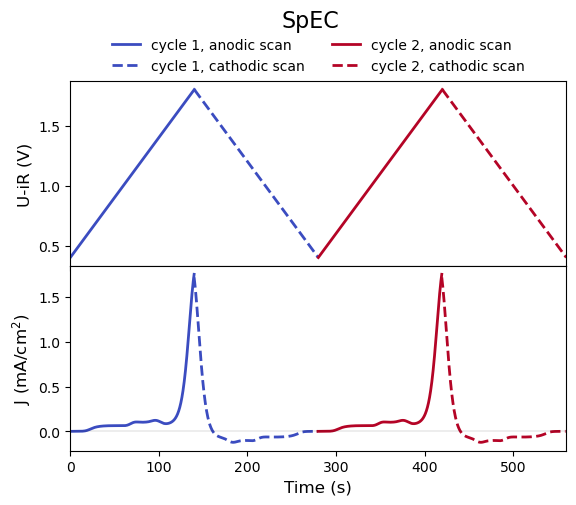

In [14]:
colors_cycle = plt.cm.coolwarm(np.linspace(0, 1, 2))


fig, ax = plt.subplots(2,1)
for i, (t, E) in enumerate(zip(t_profile, E_profile)):
    if i<2:
        if i%2==0:
            ax[0].plot(t, E, color=colors_cycle[0], label='cycle 1, anodic scan', linewidth=2)
        else:
            ax[0].plot(t, E, linestyle='--',color=colors_cycle[0], label='cycle 1, cathodic scan', linewidth=2)
    else:
        if i%2==0:
            ax[0].plot(t, E, color=colors_cycle[1], label='cycle 2, anodic scan', linewidth=2)
        else:
            ax[0].plot(t, E, linestyle='--',color=colors_cycle[1], label='cycle 2, cathodic scan', linewidth=2)
# legend on top layour horizontally
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, frameon=False)

for i, (t, J) in enumerate(zip(t_CV, J_CV)):
    if i<2:
        if i%2==0:
            ax[1].plot(t, J*1000, color=colors_cycle[0], label='cycle 1, anodic scan', linewidth=2)
        else:
            ax[1].plot(t, J*1000, linestyle='--',color=colors_cycle[0], label='cycle 1, cathodic scan', linewidth=2)
    else:
        if i%2==0:
            ax[1].plot(t, J*1000, color=colors_cycle[1], label='cycle 2, anodic scan', linewidth=2)
        else:
            ax[1].plot(t, J*1000, linestyle='--',color=colors_cycle[1], label='cycle 2, cathodic scan', linewidth=2)
# make the overall title SpEC, adjust the position to be higher
fig.suptitle('SpEC', y=1.03, fontsize=16)

# place a horizontal line at y=0 in ax[1]
ax[1].axhline(0, color='black', linewidth=0.1)

# remove the x-axis values from ax[0]
ax[0].set_xticklabels([])
# combine the lower edge of the two subplots
plt.subplots_adjust(hspace=0.0)

# ax1 x label is time (s)
ax[1].set_xlabel('Time (s)', fontsize=12)
# ax0 y label is U-iR (V)
ax[0].set_ylabel('U-iR (V)', fontsize=12)
# ax1 y label is J (A/cm^2)
ax[1].set_ylabel('J (mA/cm$^2$)', fontsize=12)

#set both x lim to 0 550
ax[0].set_xlim(0,560)
ax[1].set_xlim(0,560)


In [15]:

SW_U2_list=[0.65, 0.67, 0.7, 0.75, 0.8]
# generate a cmc.batlow color map the length of the SW_U2_list
colors_SW = plt.cm.coolwarm(np.linspace(0, 1, len(SW_U2_list)))


Text(0.5, 1.01, 'SW-SpEC\n $U_1$=0.6V, U2:')

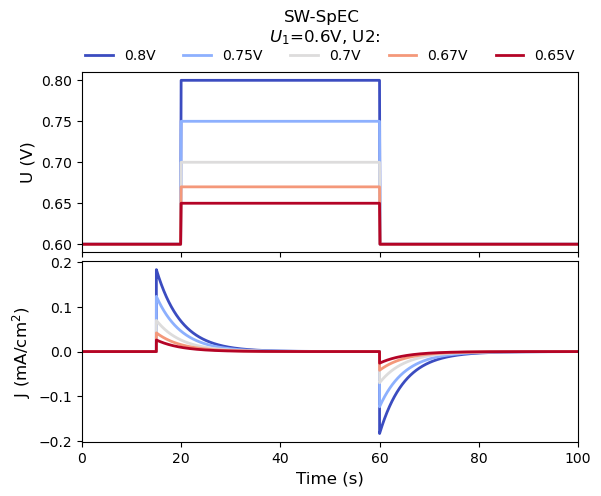

In [16]:
# read in J_SW_all.parquet
fig2, ax2 = plt.subplots(2,1)
J_SW = pd.read_parquet(path.joinpath('J_SW_all.parquet'))
for i, U in enumerate(reversed(J_SW.columns[:-1])):
    ax2[1].plot(J_SW.index, J_SW[U]*1000, label=f'{U}V', linewidth=2, color=colors_SW[i])
def square_wave(t:np.array, t1:float,t2:float, V1:float, V2:float):
    """
    This function generates a square wave that is V2 between t1 and t2 and V1 elsewhere
    """
    return np.where((t>=t1) & (t<=t2), V2, V1)

t=np.arange(0,100,0.1)
V1=0.6

for i, U2 in enumerate(reversed(SW_U2_list)):
    ax2[0].plot(t, square_wave(t, 20, 60, V1, U2), label=f'{U2}V', linewidth=2, color=colors_SW[i])

# for the y scale of ax2 use engineering notation
ax2[1].ticklabel_format(axis='y', style='plain', scilimits=(0,0))
# ax 2 y label is J (mA/cm^2)
ax2[1].set_ylabel('J (mA/cm$^2$)', fontsize=12)
# ax 2 x label is time (s)
ax2[1].set_xlabel('Time (s)', fontsize=12)

# remove the x-axis values from ax2
ax2[0].set_xticklabels([]);

# y axis of ax2 is the square wave voltage
ax2[0].set_ylabel('U (V)', fontsize=12)
# combine the lower edge of the two subplots
plt.subplots_adjust(hspace=0.05)
# set both x lim to 0-100
ax2[0].set_xlim(0, 100)
# set both x lim to 0-100
ax2[1].set_xlim(0, 100)

# show the legend for both ax2 and ax1
ax2[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, frameon=False)
# ovall title is SW r'SW-SpEC  $U_1$=0.6V and U2 of:' with a newline
fig2.suptitle(r'SW-SpEC' + '\n' + r' $U_1$=0.6V, U2:', y=1.01, fontsize=12)

Text(0.5, 0.99, 'PD-SpEC \n $U_1=01.55 V$')

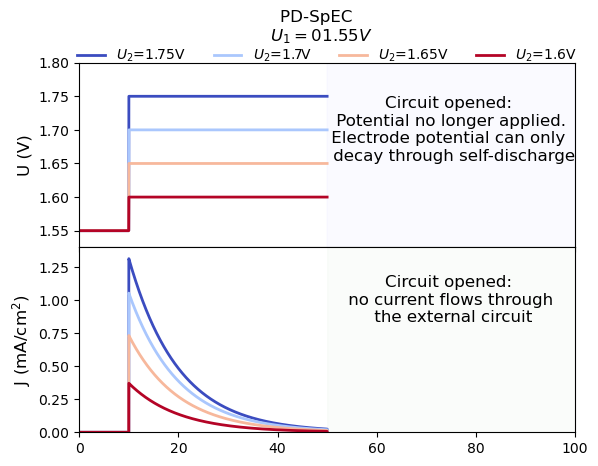

In [17]:
# import PD_J_dyn.parquet
J_dyn = pd.read_parquet(path.joinpath('PD_J_dyn.parquet'))

# for index.values > 50 set the value to - using where. else keep the value
J_dyn.loc[J_dyn.index >= 60] = np.nan


# make a coolwarm color map the length of the columns in J_dyn
colors_SW = plt.cm.coolwarm(np.linspace(0, 1, len(J_dyn.columns)))


fig3, ax3 = plt.subplots(2,1)
for i, U in enumerate(reversed(J_dyn.columns)):
    ax3[1].plot(J_dyn.index, J_dyn[U]*1000, label=f'{U}V', linewidth=2, color=colors_SW[i])
# set the x lim to 0-100
ax3[1].set_xlim(0, 100)


#  color the area between 50 and 100 in grey
ax3[1].fill_between(J_dyn.index, -1, 2, where=(J_dyn.index >= 50), color='green', alpha=0.02)
# set y scale to be between 0 and 1.4
ax3[1].set_ylim(0, 1.4)

# add text to the plot at x=75, y=1 with the text 'Dynamic SW'

ax3[1].text(75, 1, 'Circuit opened: \n no current flows through \n the external circuit', fontsize=12, ha='center', va='center')

# generate a coolwarm color map the length of the columns in J_dyn

for i, U in enumerate(reversed(J_dyn.columns)):
    SW=square_wave(t=J_dyn.index, t1=10, t2=50, V1=1.55, V2=U)
    SW=np.where(J_dyn.index>=50, np.NaN, SW)
    ax3[0].plot(J_dyn.index, SW, color=colors_SW[i], linewidth=2, label=f'$U_2$={np.round(U,3)}V')

# set the x lim to 0-100
ax3[0].set_xlim(0, 100)


# remove the x-axis values from ax3
ax3[0].set_xticklabels([])
# combine the lower edge of the two subplots
plt.subplots_adjust(hspace=0.0)

# ax3 y label is U (V)
ax3[0].set_ylabel('U (V)', fontsize=12)
# ax3 y label is J (mA/cm^2)
ax3[1].set_ylabel('J (mA/cm$^2$)', fontsize=12)

#  color the area between 50 and 100 in light green
ax3[0].fill_between(J_dyn.index, -1, 2, where=(J_dyn.index >= 50), color='blue', alpha=0.02)

# add a text to the plot at x=75, y=1 with the text 'Dynamic SW'
ax3[0].text(75, 1.7, 'Circuit opened: \n Potential no longer applied. \n Electrode potential can only  \n decay through self-discharge', fontsize=12, ha='center', va='center')

#set y lim to 1-2
ax3[0].set_ylim(1.525, 1.8)

# create a legend for ax3[0] at the top of the plot
ax3[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, frameon=False)
# set the overall title to PD-SpEC
fig3.suptitle('PD-SpEC \n $U_1=01.55 V$', y=0.99, fontsize=12)


